# Activation Function Comparison
This notebook compares the convergence behavior and gradient dynamics of common activation functions on CIFAR-10 using PyTorch.

We investigate:
- ReLU
- Sigmoid
- Tanh
- Leaky ReLU
- Swish

We evaluate their:
- Convergence rate (loss curve)
- Gradient flow across epochs
- Classification accuracy
- Theoretical properties (range, smoothness, derivative behavior)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/tml_project')  # Adjust if needed


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import torch.nn as nn

from modelling.model_builder import CNNModel
from modelling.trainer import train_model
from modelling.utils import get_data_loaders, set_seed

from visualization.loss_plots import plot_losses, plot_accuracy
from visualization.gradient_flow import plot_gradient_flow
from visualization.activation_derivatives import (
    plot_activation_and_derivative,
    relu, d_relu, sigmoid, d_sigmoid, tanh, d_tanh,
    leaky_relu, d_leaky_relu, swish, d_swish
)

In [3]:
import os
import matplotlib.pyplot as plt

# Folder to save plots in your Drive
save_dir = '/content/drive/MyDrive/tml_project/plots'
os.makedirs(save_dir, exist_ok=True)

def save_plot(fig, filename):
    path = os.path.join(save_dir, filename)
    fig.savefig(path)
    print(f"✅ Saved plot to {path}")
    plt.close(fig)


In [4]:
set_seed(42)
train_loader, val_loader = get_data_loaders(batch_size=128)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
activations = {
    "ReLU": lambda: nn.ReLU(),
    "Sigmoid": lambda: nn.Sigmoid(),
    "Tanh": lambda: nn.Tanh(),
    "Leaky ReLU": lambda: nn.LeakyReLU(0.01),
    "Swish": lambda: nn.SiLU()
}



--- Training with ReLU ---


Epoch 10/10: 100%|██████████| 391/391 [00:15<00:00, 25.39it/s]


<Figure size 640x480 with 0 Axes>

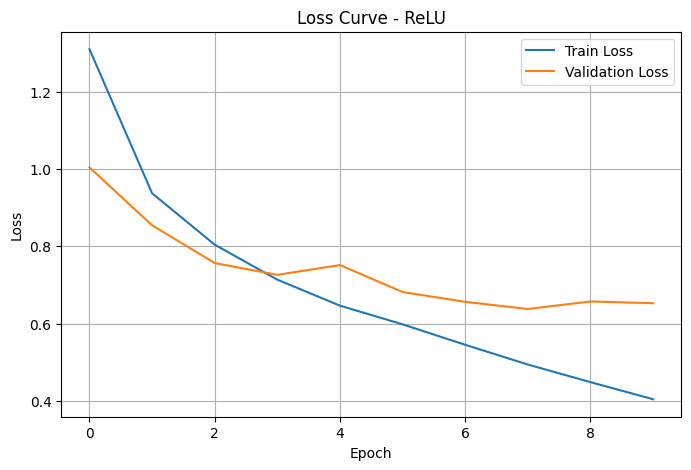

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/ReLU_loss_curve.png


<Figure size 640x480 with 0 Axes>

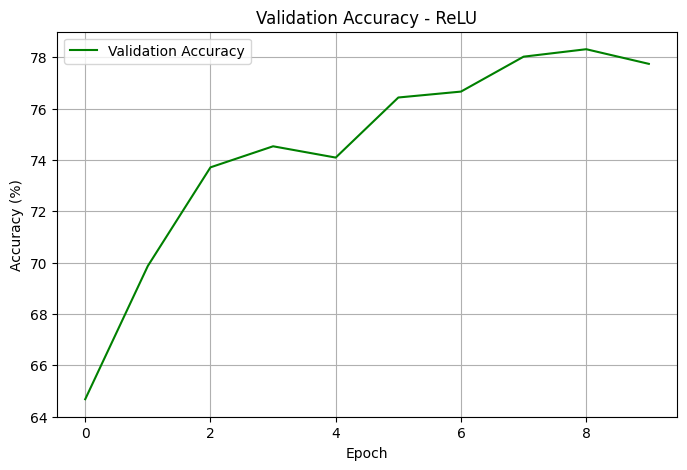

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/ReLU_accuracy.png


<Figure size 640x480 with 0 Axes>

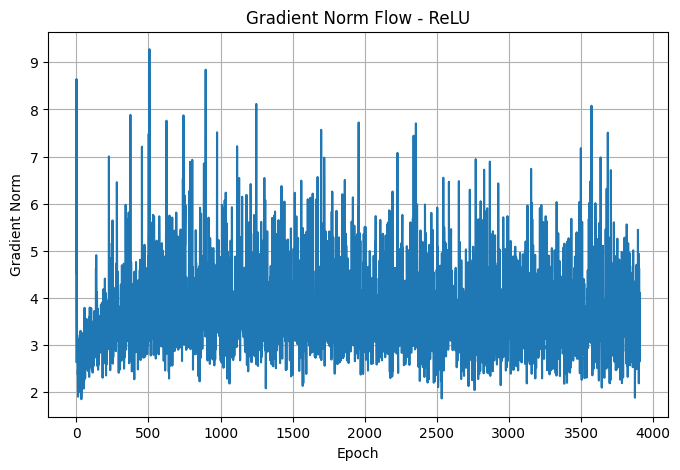

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/ReLU_gradient_flow.png

--- Training with Sigmoid ---


Epoch 10/10: 100%|██████████| 391/391 [00:15<00:00, 26.05it/s]


<Figure size 640x480 with 0 Axes>

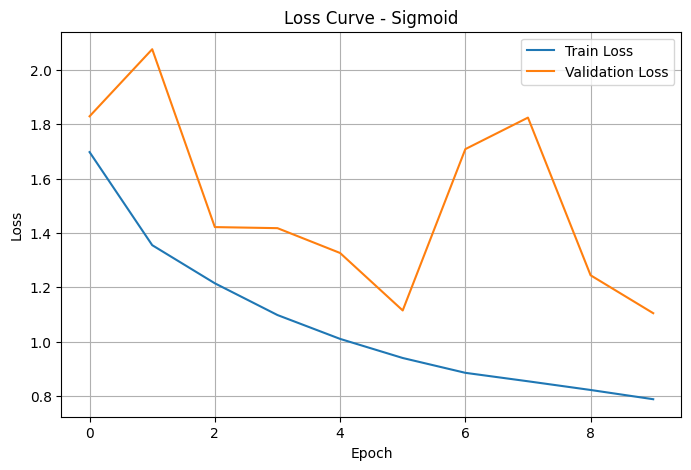

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Sigmoid_loss_curve.png


<Figure size 640x480 with 0 Axes>

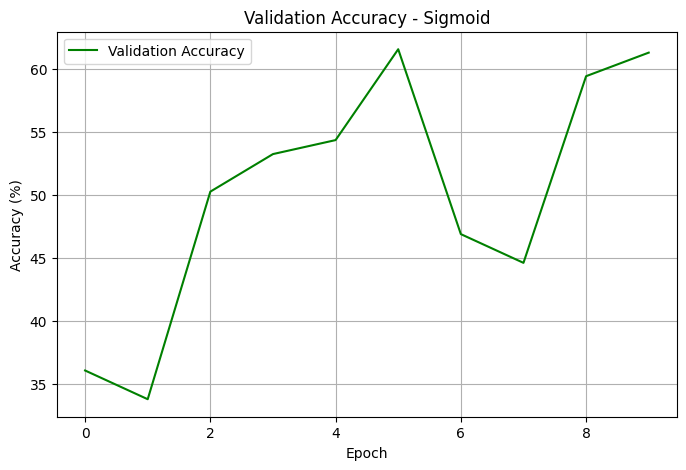

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Sigmoid_accuracy.png


<Figure size 640x480 with 0 Axes>

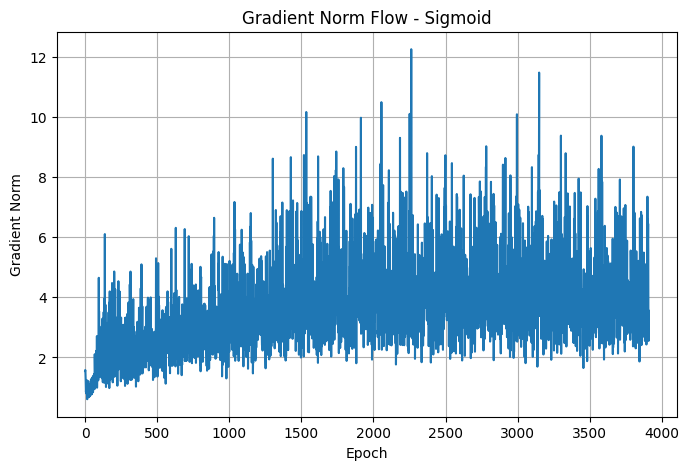

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Sigmoid_gradient_flow.png

--- Training with Tanh ---


Epoch 10/10: 100%|██████████| 391/391 [00:15<00:00, 25.30it/s]


<Figure size 640x480 with 0 Axes>

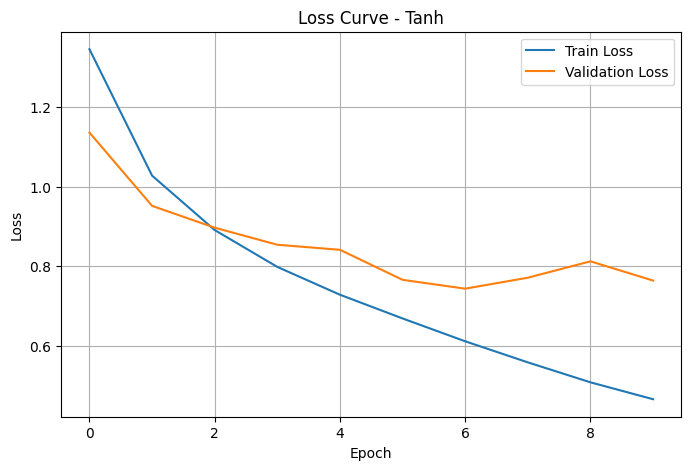

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Tanh_loss_curve.png


<Figure size 640x480 with 0 Axes>

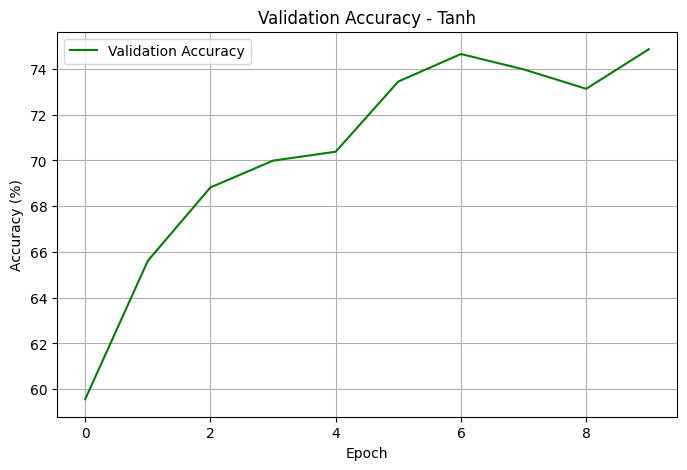

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Tanh_accuracy.png


<Figure size 640x480 with 0 Axes>

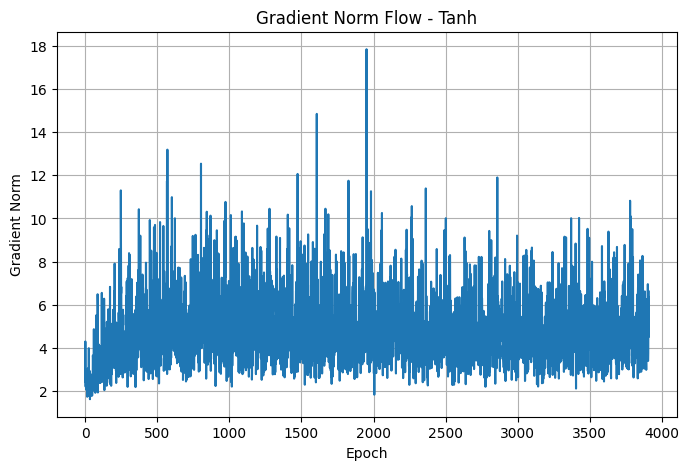

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Tanh_gradient_flow.png

--- Training with Leaky ReLU ---


Epoch 10/10: 100%|██████████| 391/391 [00:15<00:00, 26.03it/s]


<Figure size 640x480 with 0 Axes>

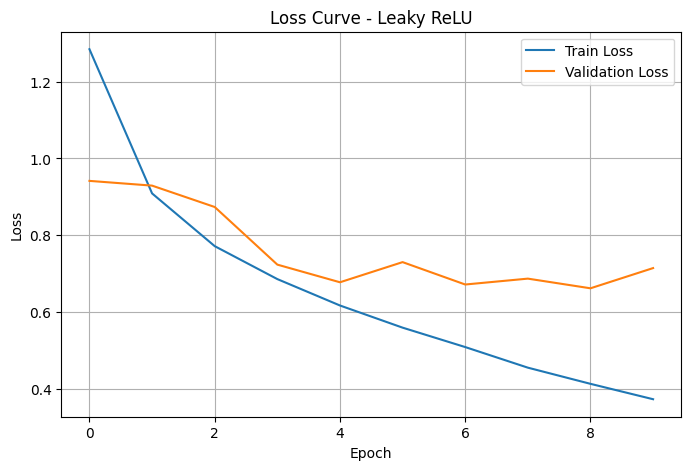

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Leaky ReLU_loss_curve.png


<Figure size 640x480 with 0 Axes>

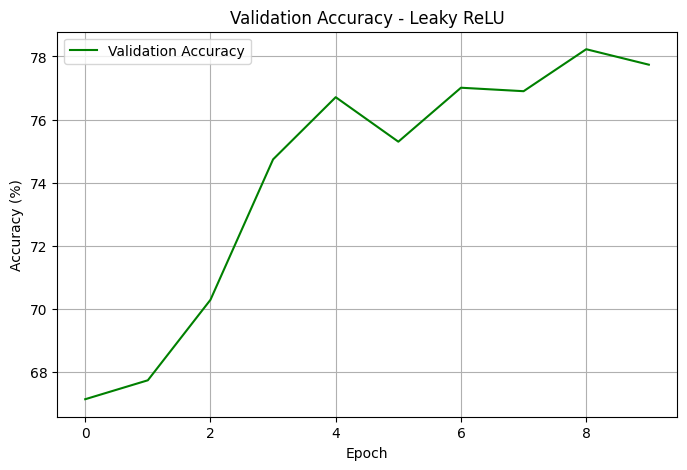

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Leaky ReLU_accuracy.png


<Figure size 640x480 with 0 Axes>

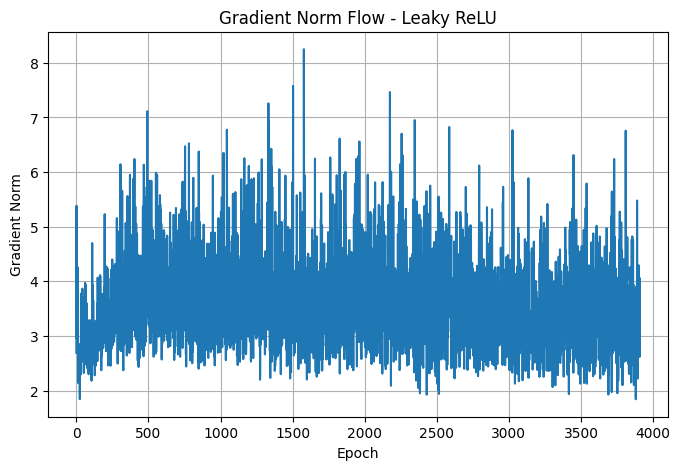

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Leaky ReLU_gradient_flow.png

--- Training with Swish ---


Epoch 10/10: 100%|██████████| 391/391 [00:15<00:00, 25.60it/s]


<Figure size 640x480 with 0 Axes>

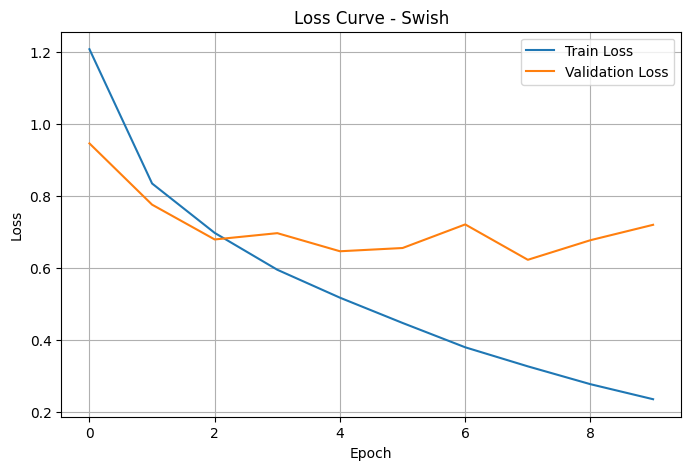

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Swish_loss_curve.png


<Figure size 640x480 with 0 Axes>

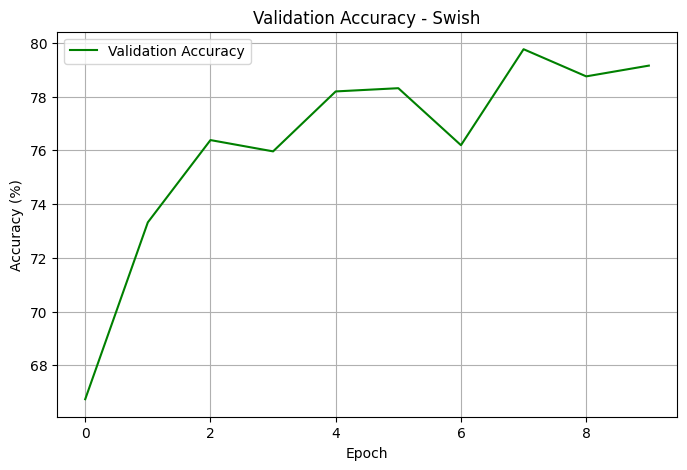

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Swish_accuracy.png


<Figure size 640x480 with 0 Axes>

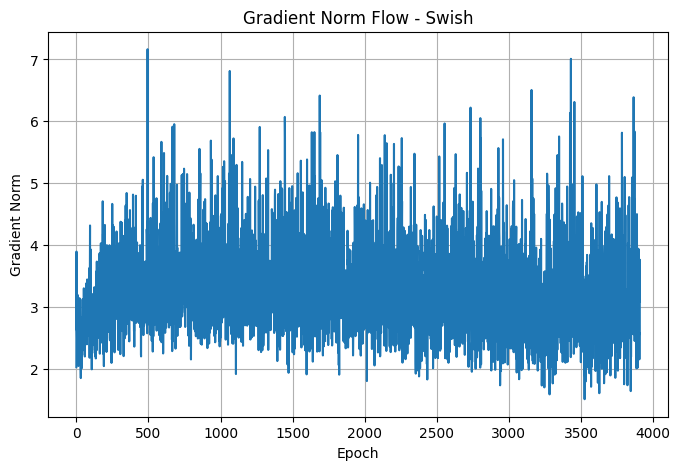

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Swish_gradient_flow.png


In [6]:
results = {}

for name, act_fn in activations.items():
    print(f"\n--- Training with {name} ---")
    model = CNNModel(act_fn())
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    train_loss, val_loss, val_acc, grads = train_model(
        model, train_loader, val_loader,
        optimizer, criterion, device,
        epochs=10
    )

    results[name] = {
        "train_loss": train_loss,
        "val_loss": val_loss,
        "val_acc": val_acc,
        "grads": grads
    }

    # Loss curve
    fig = plt.figure()
    plot_losses(train_loss, val_loss, name)
    save_plot(fig, f"{name}_loss_curve.png")

    # Accuracy
    fig = plt.figure()
    plot_accuracy(val_acc, name)
    save_plot(fig, f"{name}_accuracy.png")

    # Gradient flow
    fig = plt.figure()
    plot_gradient_flow(grads, name)
    save_plot(fig, f"{name}_gradient_flow.png")



--- Activation Function Derivatives ---


<Figure size 640x480 with 0 Axes>

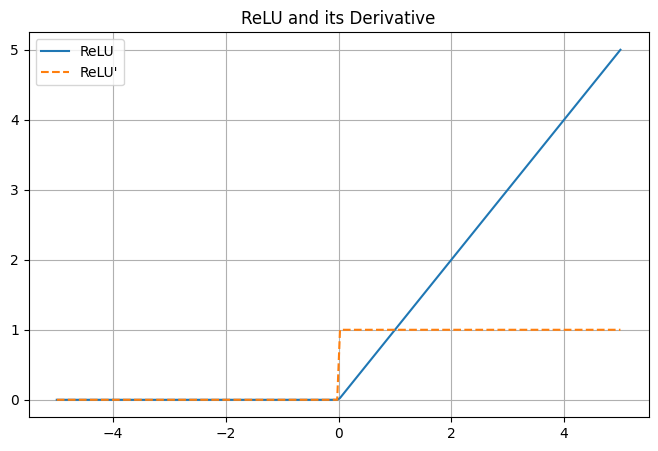

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/ReLU_derivative.png


<Figure size 640x480 with 0 Axes>

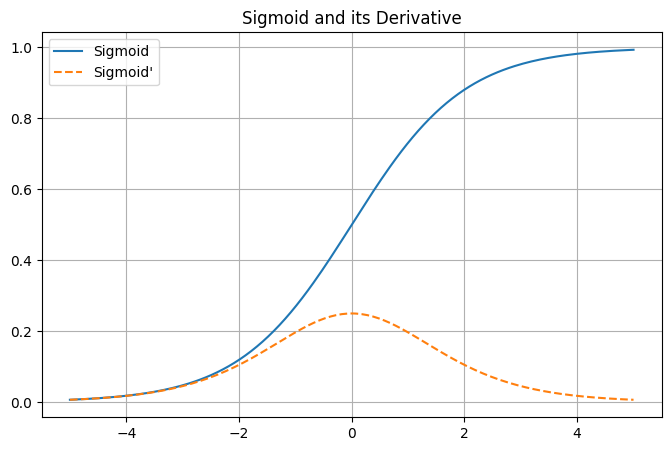

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Sigmoid_derivative.png


<Figure size 640x480 with 0 Axes>

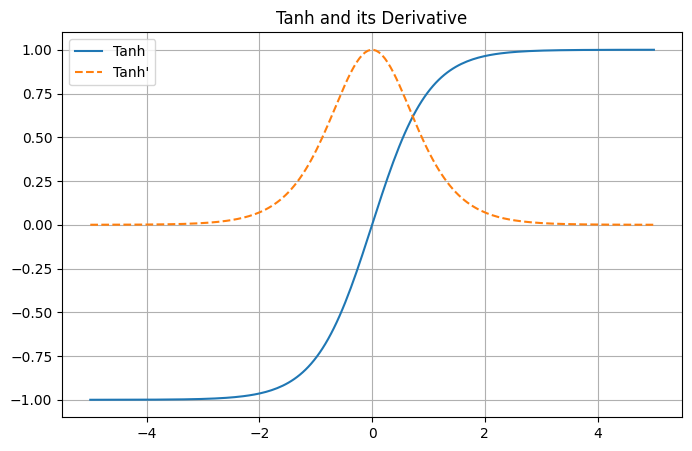

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Tanh_derivative.png


<Figure size 640x480 with 0 Axes>

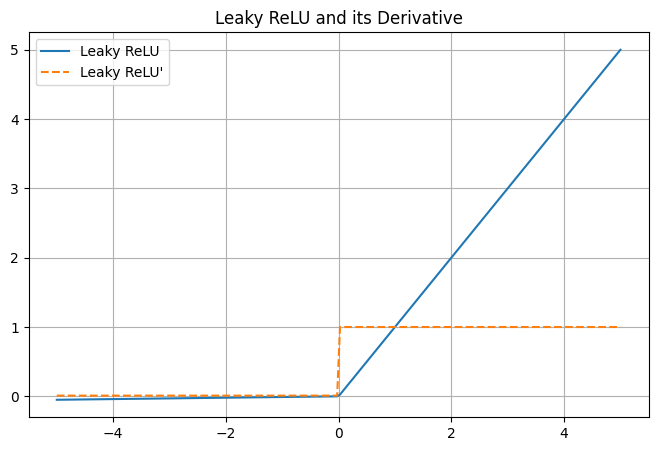

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Leaky_ReLU_derivative.png


<Figure size 640x480 with 0 Axes>

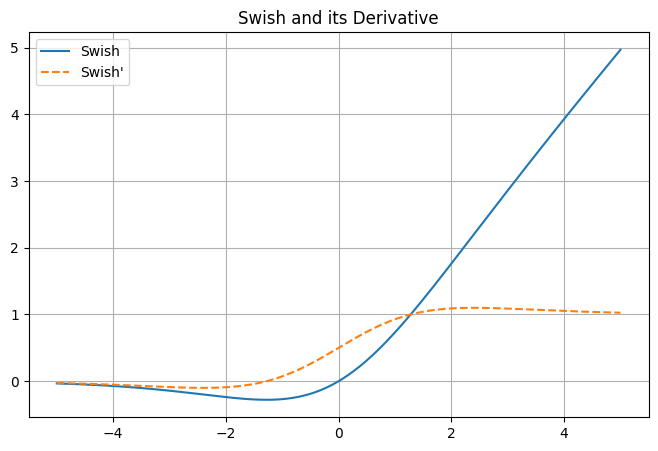

✅ Saved plot to /content/drive/MyDrive/tml_project/plots/Swish_derivative.png


In [7]:
print("\n--- Activation Function Derivatives ---")

fig = plt.figure()
plot_activation_and_derivative(relu, d_relu, "ReLU")
save_plot(fig, "ReLU_derivative.png")

fig = plt.figure()
plot_activation_and_derivative(sigmoid, d_sigmoid, "Sigmoid")
save_plot(fig, "Sigmoid_derivative.png")

fig = plt.figure()
plot_activation_and_derivative(tanh, d_tanh, "Tanh")
save_plot(fig, "Tanh_derivative.png")

fig = plt.figure()
plot_activation_and_derivative(leaky_relu, d_leaky_relu, "Leaky ReLU")
save_plot(fig, "Leaky_ReLU_derivative.png")

fig = plt.figure()
plot_activation_and_derivative(swish, d_swish, "Swish")
save_plot(fig, "Swish_derivative.png")
